读取数据;
将数据分为自变量x和因变量y;
过采样SMOTE取得数据集X,Y，并由X,Y随机划分训练集和测试集

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


def get_data():
    data = pd.read_excel('/Users/ycy/Desktop/default_of_credit_card_clients_2.xls', skiprows=[0], header=0, index_col=[0])
    x_feature = list(data.columns)
    x_feature.remove('default payment next month')
    x = data[x_feature]
    y = data['default payment next month']
    sm = SMOTE(random_state=42)# 处理过采样的方法
    X, Y = sm.fit_sample(x, y)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size =0.2, random_state =0)
    return x_train, x_test, y_train, y_test

# 1 decision tree

训练模型，计算用时，计算准确率，精确率和召回率（通过混淆矩阵计算）

In [2]:
import time
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier


def DT_model(x_train, x_test, y_train, y_test):
    #训练模型
    start = time.time()
    clf_model_DT = DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=5) # 决策树分类器
    #参数说明：https://blog.csdn.net/li980828298/article/details/51172744
    clf_model_DT.fit(x_train,y_train)
    end = time.time()
    print("Time usage: %s s" %(end - start))
    #评估模型
    #confusion matrix
    prediction_train = clf_model_DT.predict(x_train)
    conf_mat_train = confusion_matrix(y_train, prediction_train)
    prediction_test = clf_model_DT.predict(x_test)
    conf_mat_test = confusion_matrix(y_test, prediction_test)
    print('----DecisionTree----')
    print("Confusion matrix for training dataset is \n %s \n Confusion matrix for testing dataset is \n %s." %(conf_mat_train, conf_mat_test))
    
    #accuracy
    print("train accuracy:", clf_model_DT.score(x_train, y_train))
    print("test accuracy:", clf_model_DT.score(x_test, y_test))
    
    precision_accuracy = conf_mat_test[1,1] / (conf_mat_test[1,1] + conf_mat_test[0,1])
    print("Precision:", precision_accuracy)
    
    recall_accuracy = conf_mat_test[1,1] / (conf_mat_test[1,1] + conf_mat_test[1,0])
    print("Recall:", recall_accuracy)
    return prediction_test, conf_mat_test

In [3]:
import matplotlib.pyplot as plt


def cm_plot(conf_mat_test, title):
    plt.matshow(conf_mat_test, cmap=plt.cm.Blues) #cm表示colormap
    plt.colorbar()
    for x in range(len(conf_mat_test)):
        for y in range(len(conf_mat_test)):
            plt.annotate(conf_mat_test[y,x], xy=(x, y), horizontalalignment='center', verticalalignment='center') #plt.annaotate图形中添加注释
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('%s'%title)
    return plt
    

Time usage: 0.2886068820953369 s
----DecisionTree----
Confusion matrix for training dataset is 
 [[16383  2368]
 [ 4708 13923]] 
 Confusion matrix for testing dataset is 
 [[3989  624]
 [1218 3515]].
train accuracy: 0.810711037397678
test accuracy: 0.8029103359726086
Precision: 0.8492389466054603
Recall: 0.7426579336572998


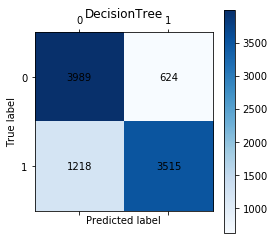

In [4]:
if __name__ =='__main__':
    x_train, x_test, y_train, y_test = get_data()
    prediction_test, conf_mat_test = DT_model(x_train, x_test, y_train, y_test)
    cm_plot(conf_mat_test, 'DecisionTree').show() #显示混淆矩阵可视化结果

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

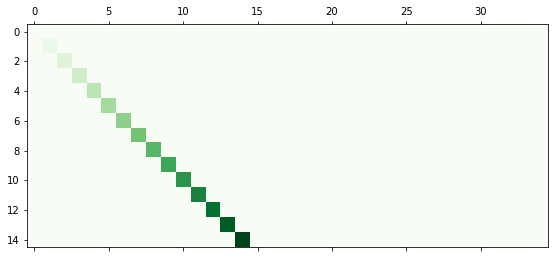

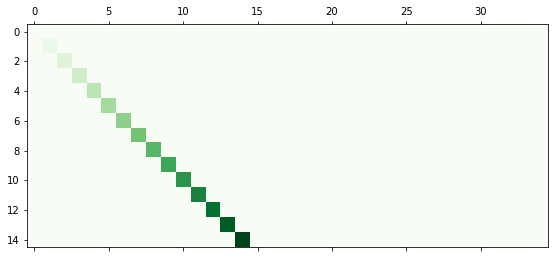

In [5]:
#plt.matshow用法
import numpy as np


def samplemat(dims):
    """Make a matrix with all zeros and increasing elements on the diagonal""" #定义一个矩阵
    aa = np.zeros(dims)
    for i in range(min(dims)):
        aa[i, i] = i
    return aa


# Display matrix
print(samplemat((15,35)))
plt.matshow(samplemat((15, 35)),cmap=plt.cm.Greens) #dims=(15,35) #cmap也可不写，不写则为默认颜色

plt.show()

# 2 random forest

In [6]:
import time
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


def RF_model(x_train, x_test, y_train, y_test):
    #训练模型
    start = time.time()
    clf_model_RF = RandomForestClassifier(n_estimators=30,max_depth=15) #随即森林分类器
    #参数说明：https://blog.csdn.net/u012102306/article/details/52228516
    clf_model_RF.fit(x_train,y_train)
    end = time.time()
    print("Time usage: %s s" %(end - start))
    #评估模型
    #confusion matrix
    prediction_train = clf_model_RF.predict(x_train)
    conf_mat_train = confusion_matrix(y_train, prediction_train)
    prediction_test = clf_model_RF.predict(x_test)
    conf_mat_test = confusion_matrix(y_test, prediction_test)
    print('----RandomForest----')
    print("Confusion matrix for training dataset is \n %s \n Confusion matrix for testing dataset is \n %s." %(conf_mat_train, conf_mat_test))
    
    #accuracy
    print("train accuracy:", clf_model_RF.score(x_train, y_train))
    print("test accuracy:", clf_model_RF.score(x_test, y_test))
    
    precision_accuracy = conf_mat_test[1,1] / (conf_mat_test[1,1] + conf_mat_test[0,1])
    print("Precision:", precision_accuracy)
    
    recall_accuracy = conf_mat_test[1,1] / (conf_mat_test[1,1] + conf_mat_test[1,0])
    print("Recall:", recall_accuracy)
    return prediction_test, conf_mat_test

In [7]:
import matplotlib.pyplot as plt


def cm_plot(conf_mat_test, title):
    plt.matshow(conf_mat_test, cmap=plt.cm.Blues) #cm表示colormap
    plt.colorbar()
    for x in range(len(conf_mat_test)):
        for y in range(len(conf_mat_test)):
            plt.annotate(conf_mat_test[y,x], xy=(x, y), horizontalalignment='center', verticalalignment='center') #plt.annaotate图形中添加注释
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('%s'%title)
    return plt

Time usage: 2.3170218467712402 s
Time usage: 2.3170218467712402 s
----RandomForest----
Confusion matrix for training dataset is 
 [[18399   352]
 [ 1907 16724]] 
 Confusion matrix for testing dataset is 
 [[4248  365]
 [ 826 3907]].
train accuracy: 0.9395698464501632
----RandomForest----
Confusion matrix for training dataset is 
 [[18399   352]
 [ 1907 16724]] 
 Confusion matrix for testing dataset is 
 [[4248  365]
 [ 826 3907]].
train accuracy: 0.9395698464501632
test accuracy: 0.8725658035523218
Precision: 0.9145599250936329
Recall: 0.8254806676526516
test accuracy: 0.8725658035523218
Precision: 0.9145599250936329
Recall: 0.8254806676526516


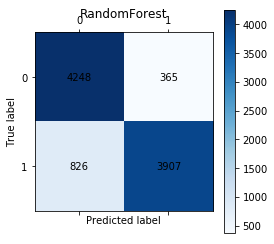

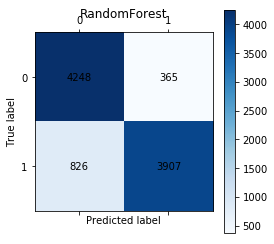

In [8]:
if __name__ =='__main__':
    x_train, x_test, y_train, y_test = get_data()
    prediction_test, conf_mat_test = RF_model(x_train, x_test, y_train, y_test)
    cm_plot(conf_mat_test, 'RandomForest').show() #显示混淆矩阵可视化结果

# 3 梯度提升决策树(GBDT)

In [9]:
import time
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier


def GBDT_model(x_train, x_test, y_train, y_test):
    #训练模型
    start = time.time()
    clf_model_GBDT = GradientBoostingClassifier(n_estimators=30,max_depth=15) #参数设说明：https://blog.csdn.net/han_xiaoyang/article/details/52663170
    clf_model_GBDT.fit(x_train,y_train)
    end = time.time()
    print("Time usage: %s s" %(end - start))
    #评估模型
    #confusion matrix
    prediction_train = clf_model_GBDT.predict(x_train)
    conf_mat_train = confusion_matrix(y_train, prediction_train)
    prediction_test = clf_model_GBDT.predict(x_test)
    conf_mat_test = confusion_matrix(y_test, prediction_test)
    print('----GBDT----')
    print("Confusion matrix for training dataset is \n %s \n Confusion matrix for testing dataset is \n %s." %(conf_mat_train, conf_mat_test))
    
    #accuracy
    print("train accuracy:", clf_model_GBDT.score(x_train, y_train))
    print("test accuracy:", clf_model_GBDT.score(x_test, y_test))
    
    precision_accuracy = conf_mat_test[1,1] / (conf_mat_test[1,1] + conf_mat_test[0,1])
    print("Precision:", precision_accuracy)
    
    recall_accuracy = conf_mat_test[1,1] / (conf_mat_test[1,1] + conf_mat_test[1,0])
    print("Recall:", recall_accuracy)
    return prediction_test, conf_mat_test

In [10]:
import matplotlib.pyplot as plt


def cm_plot(conf_mat_test, title):
    plt.matshow(conf_mat_test, cmap=plt.cm.Blues) #cm表示colormap
    plt.colorbar()
    for x in range(len(conf_mat_test)):
        for y in range(len(conf_mat_test)):
            plt.annotate(conf_mat_test[y,x], xy=(x, y), horizontalalignment='center', verticalalignment='center') #plt.annaotate图形中添加注释
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('%s'%title)
    return plt

Time usage: 100.03531289100647 s
Time usage: 100.03531289100647 s
----GBDT----
Confusion matrix for training dataset is 
 [[18703    48]
 [  282 18349]] 
 Confusion matrix for testing dataset is 
 [[4210  403]
 [ 777 3956]].
train accuracy: 0.9911722219249907
test accuracy: 0.8737427776588915
Precision: 0.9075476026611609
Recall: 0.8358335094020706
----GBDT----
Confusion matrix for training dataset is 
 [[18703    48]
 [  282 18349]] 
 Confusion matrix for testing dataset is 
 [[4210  403]
 [ 777 3956]].
train accuracy: 0.9911722219249907
test accuracy: 0.8737427776588915
Precision: 0.9075476026611609
Recall: 0.8358335094020706


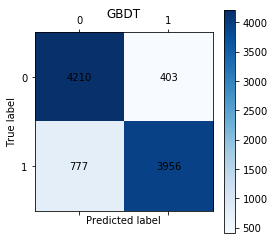

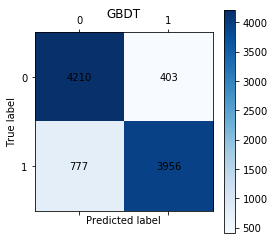

In [11]:
if __name__ =='__main__':
    x_train, x_test, y_train, y_test = get_data()
    prediction_test, conf_mat_test = GBDT_model(x_train, x_test, y_train, y_test)
    cm_plot(conf_mat_test, 'GBDT').show() #显示混淆矩阵可视化结果

# 4 logistic回归

In [12]:
import time
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression


def LR_model(x_train, x_test, y_train, y_test):
    #训练模型
    start = time.time()
    clf_model_LR = LogisticRegression(C=1,penalty='l1') #参数说明：https://blog.csdn.net/jark_/article/details/78342644
    clf_model_LR.fit(x_train,y_train)
    end = time.time()
    print("Time usage: %s s" %(end - start))
    #评估模型
    #confusion matrix
    prediction_train = clf_model_LR.predict(x_train)
    conf_mat_train = confusion_matrix(y_train, prediction_train)
    prediction_test = clf_model_LR.predict(x_test)
    conf_mat_test = confusion_matrix(y_test, prediction_test)
    print('----Logistic Regression----')
    print("Confusion matrix for training dataset is \n %s \n Confusion matrix for testing dataset is \n %s." %(conf_mat_train, conf_mat_test))
    
    #accuracy
    print("train accuracy:", clf_model_LR.score(x_train, y_train))
    print("test accuracy:", clf_model_LR.score(x_test, y_test))
    
    precision_accuracy = conf_mat_test[1,1] / (conf_mat_test[1,1] + conf_mat_test[0,1])
    print("Precision:", precision_accuracy)
    
    recall_accuracy = conf_mat_test[1,1] / (conf_mat_test[1,1] + conf_mat_test[1,0])
    print("Recall:", recall_accuracy)
    return prediction_test, conf_mat_test

In [13]:
import matplotlib.pyplot as plt


def cm_plot(conf_mat_test, title):
    plt.matshow(conf_mat_test, cmap=plt.cm.Blues) #cm表示colormap
    plt.colorbar()
    for x in range(len(conf_mat_test)):
        for y in range(len(conf_mat_test)):
            plt.annotate(conf_mat_test[y,x], xy=(x, y), horizontalalignment='center', verticalalignment='center') #plt.annaotate图形中添加注释
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('%s'%title)
    return plt

Time usage: 1.5065701007843018 s
----Logistic Regression----
Confusion matrix for training dataset is 
 [[13642  5109]
 [ 6291 12340]] 
 Confusion matrix for testing dataset is 
 [[3310 1303]
 [1564 3169]].
train accuracy: 0.6950403937724038
test accuracy: 0.693237748769527
Precision: 0.7086314847942755
Recall: 0.669554193957321
Time usage: 1.5065701007843018 s
----Logistic Regression----
Confusion matrix for training dataset is 
 [[13642  5109]
 [ 6291 12340]] 
 Confusion matrix for testing dataset is 
 [[3310 1303]
 [1564 3169]].
train accuracy: 0.6950403937724038
test accuracy: 0.693237748769527
Precision: 0.7086314847942755
Recall: 0.669554193957321


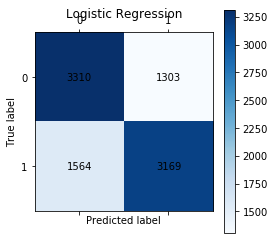

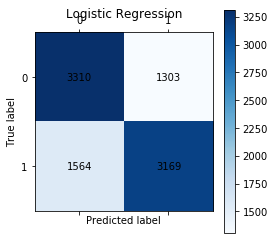

In [14]:
if __name__ =='__main__':
    x_train, x_test, y_train, y_test = get_data()
    prediction_test, conf_mat_test = LR_model(x_train, x_test, y_train, y_test)
    cm_plot(conf_mat_test, 'Logistic Regression').show() #显示混淆矩阵可视化结果

# 5 svm

SVM运行太慢，用部分数据跑（原数据30000条，现用数据300条），数据为get_data_SVM( )

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


def get_data_SVM():
    data = pd.read_excel('/Users/ycy/Desktop/default_of_credit_card_clients_3.xls', skiprows=[0], header=0, index_col=[0])
    x_feature = list(data.columns)
    x_feature.remove('default payment next month')
    x = data[x_feature]
    y = data['default payment next month']
    sm = SMOTE(random_state=42)# 处理过采样的方法
    X, Y = sm.fit_sample(x, y)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size =0.2, random_state =0)
    return x_train, x_test, y_train, y_test

In [16]:
import time
from sklearn.metrics import confusion_matrix
from sklearn import svm


def SVM_model(x_train, x_test, y_train, y_test):
    #训练模型
    start = time.time()
    clf_model_SVM = svm.SVC(C=0.1, kernel='linear', gamma='auto', decision_function_shape='ovr',class_weight='balanced')
    #参数说明：https://blog.csdn.net/wusecaiyun/article/details/49681431   https://blog.csdn.net/bryan__/article/details/51506801
    clf_model_SVM.fit(x_train,y_train)
    end = time.time()
    print("Time usage: %s s" %(end - start))
    #评估模型
    #confusion matrix
    prediction_train = clf_model_SVM.predict(x_train)
    conf_mat_train = confusion_matrix(y_train, prediction_train)
    prediction_test = clf_model_SVM.predict(x_test)
    conf_mat_test = confusion_matrix(y_test, prediction_test)
    print('----SVM----')
    print("Confusion matrix for training dataset is \n %s \n Confusion matrix for testing dataset is \n %s." %(conf_mat_train, conf_mat_test))
    
    #accuracy
    print("train accuracy:", clf_model_SVM.score(x_train, y_train))
    print("test accuracy:", clf_model_SVM.score(x_test, y_test))
    
    precision_accuracy = conf_mat_test[1,1] / (conf_mat_test[1,1] + conf_mat_test[0,1])
    print("Precision:", precision_accuracy)
    
    recall_accuracy = conf_mat_test[1,1] / (conf_mat_test[1,1] + conf_mat_test[1,0])
    print("Recall:", recall_accuracy)
    return prediction_test, conf_mat_test

In [17]:
import matplotlib.pyplot as plt


def cm_plot(conf_mat_test, title):
    plt.matshow(conf_mat_test, cmap=plt.cm.Blues) #cm表示colormap
    plt.colorbar()
    for x in range(len(conf_mat_test)):
        for y in range(len(conf_mat_test)):
            plt.annotate(conf_mat_test[y,x], xy=(x, y), horizontalalignment='center', verticalalignment='center') #plt.annaotate图形中添加注释
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('%s'%title)
    return plt

Time usage: 283.4224042892456 s
----SVM----
Confusion matrix for training dataset is 
 [[110  76]
 [ 47 136]] 
 Confusion matrix for testing dataset is 
 [[25 20]
 [11 37]].
train accuracy: 0.6666666666666666
test accuracy: 0.6666666666666666
Precision: 0.6491228070175439
Recall: 0.7708333333333334
Time usage: 283.4224042892456 s
----SVM----
Confusion matrix for training dataset is 
 [[110  76]
 [ 47 136]] 
 Confusion matrix for testing dataset is 
 [[25 20]
 [11 37]].
train accuracy: 0.6666666666666666
test accuracy: 0.6666666666666666
Precision: 0.6491228070175439
Recall: 0.7708333333333334


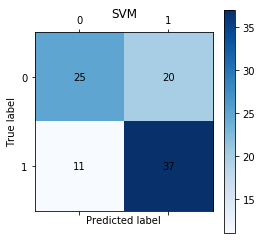

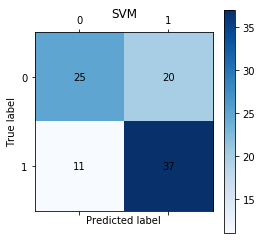

In [18]:
if __name__ =='__main__':
    x_train, x_test, y_train, y_test = get_data_SVM()
    prediction_test, conf_mat_test = SVM_model(x_train, x_test, y_train, y_test)
    cm_plot(conf_mat_test, 'SVM').show() #显示混淆矩阵可视化结果

# 6 XGBoost

In [48]:
import xgboost as xgb
import time
from sklearn import metrics


def xgboost(x_train, x_test, y_train):
    ##xgb矩阵赋值
    dtrain=xgb.DMatrix(x_train,label=y_train)
    dtest=xgb.DMatrix(x_test)

    #xgboost栗子参考：https://blog.csdn.net/sb19931201/article/details/52577592
    #xgboost参数含义：https://blog.csdn.net/han_xiaoyang/article/details/52665396
    params={'booster':'gbtree',#基于树的模型 
            'objective':'binary:logistic',#二分类的逻辑回归，返回预测的概率(不是类别)
            'eval_metric':'auc',#对于有效数据的度量方法，选取曲线下面积
            'max_depth':4,#树的最大深度
            'lambda':10,#权重的L2正则化项。(和Ridge regression类似)
            'subsample':0.75,#这个参数控制对于每棵树，随机采样的比例
            'colsample_bytree':0.75,#用来控制每棵随机采样的列数的占比(每一列是一个特征)
            'min_child_weight':2,#决定最小叶子节点样本权重和
            'eta':0.025,#和GBM中的 learning rate 参数类似
            'seed':0,#随机数的种子
            'nthread':8,#这个参数用来进行多线程控制，应当输入系统的核数
            'silent':1#当这个参数值为1时，静默模式开启，不会输出任何信息;一般这个参数就保持默认的0，因为这样能帮我们更好地理解模型
           }
    watchlist =[(dtrain,'train')]


    start = time.time()
    bst=xgb.train(params,dtrain,num_boost_round=1000,evals=watchlist )
    end = time.time()
    print("Time usage:", end - start)
    ypred=bst.predict(dtest) 
    # 设置阈值, 输出一些评价指标
    y_pred =(ypred >=0.5)*1

#     print('AUC: %.4f'% metrics.roc_auc_score(y_test,ypred))
#     print('ACC: %.4f'% metrics.accuracy_score(y_test,y_pred))
#     print('Recall: %.4f'% metrics.recall_score(y_test,y_pred))
#     print('F1-score: %.4f'%metrics.f1_score(y_test,y_pred))
#     print('Precesion: %.4f'%metrics.precision_score(y_test,y_pred))
    cm = metrics.confusion_matrix(y_test,y_pred)# cm 为混淆矩阵 
    return cm


In [52]:
import xgboost as xgb
import time
from sklearn import metrics


def xgboost(x_train, x_test, y_train):
    ##xgb矩阵赋值
    dtrain=xgb.DMatrix(x_train,label=y_train)
    dtest=xgb.DMatrix(x_test)

    #xgboost栗子参考：https://blog.csdn.net/sb19931201/article/details/52577592
    #xgboost参数含义：https://blog.csdn.net/han_xiaoyang/article/details/52665396
    params={'booster':'gbtree',#基于树的模型 
            'objective':'binary:logistic',#二分类的逻辑回归，返回预测的概率(不是类别)
            'eval_metric':'auc',#对于有效数据的度量方法，选取曲线下面积
            'max_depth':4,#树的最大深度
            'lambda':10,#权重的L2正则化项。(和Ridge regression类似)
            'subsample':0.75,#这个参数控制对于每棵树，随机采样的比例
            'colsample_bytree':0.75,#用来控制每棵随机采样的列数的占比(每一列是一个特征)
            'min_child_weight':2,#决定最小叶子节点样本权重和
            'eta':0.025,#和GBM中的 learning rate 参数类似
            'seed':0,#随机数的种子
            'nthread':8,#这个参数用来进行多线程控制，应当输入系统的核数
            'silent':1#当这个参数值为1时，静默模式开启，不会输出任何信息;一般这个参数就保持默认的0，因为这样能帮我们更好地理解模型
           }
    watchlist =[(dtrain,'train')]

    start = time.time()
    bst=xgb.train(params,dtrain,num_boost_round=1000,evals=watchlist )
    end = time.time()
    cost_time = end - start
    ypred=bst.predict(dtest) 
    # 设置阈值, 输出一些评价指标
    y_pred =(ypred >=0.5)*1
    
    cm = metrics.confusion_matrix(y_test,y_pred)# cm 为混淆矩阵 
    return cm, cost_time

In [53]:
import matplotlib.pyplot as plt


def cm_plot(cm):
    # 混淆矩阵可视化
    plt.matshow(cm, cmap=plt.cm.Blues)
    plt.colorbar()
    for x in range(len(cm)): 
        for y in range(len(cm)):
            plt.annotate(cm[y,x], xy=(x, y), horizontalalignment='center', verticalalignment='center')
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return plt

[0]	train-auc:0.865722
[1]	train-auc:0.876977
[2]	train-auc:0.878203
[3]	train-auc:0.880023
[4]	train-auc:0.880018
[5]	train-auc:0.880846
[6]	train-auc:0.888055
[7]	train-auc:0.889001
[8]	train-auc:0.889346
[9]	train-auc:0.889321
[10]	train-auc:0.893522
[11]	train-auc:0.893199
[12]	train-auc:0.892716
[13]	train-auc:0.893661
[14]	train-auc:0.895451
[15]	train-auc:0.895316
[16]	train-auc:0.898156
[17]	train-auc:0.89787
[18]	train-auc:0.899242
[19]	train-auc:0.900419
[20]	train-auc:0.900379
[21]	train-auc:0.901202
[22]	train-auc:0.902822
[23]	train-auc:0.903067
[24]	train-auc:0.903933
[25]	train-auc:0.903757
[26]	train-auc:0.903562
[27]	train-auc:0.904292
[28]	train-auc:0.904916
[29]	train-auc:0.905032
[30]	train-auc:0.90552
[31]	train-auc:0.905788
[32]	train-auc:0.906116
[33]	train-auc:0.906258
[34]	train-auc:0.906644
[35]	train-auc:0.90693
[36]	train-auc:0.907028
[37]	train-auc:0.907361
[38]	train-auc:0.907564
[39]	train-auc:0.907897
[40]	train-auc:0.908017
[41]	train-auc:0.908778
[42]	

[334]	train-auc:0.938268
[335]	train-auc:0.938308
[336]	train-auc:0.938344
[337]	train-auc:0.938391
[338]	train-auc:0.938409
[339]	train-auc:0.938438
[340]	train-auc:0.93847
[341]	train-auc:0.938516
[342]	train-auc:0.938546
[343]	train-auc:0.93857
[344]	train-auc:0.938602
[345]	train-auc:0.938647
[346]	train-auc:0.938695
[347]	train-auc:0.93871
[348]	train-auc:0.938733
[349]	train-auc:0.938773
[350]	train-auc:0.938785
[351]	train-auc:0.938824
[352]	train-auc:0.938869
[353]	train-auc:0.938901
[354]	train-auc:0.938918
[355]	train-auc:0.938933
[356]	train-auc:0.938945
[357]	train-auc:0.938963
[358]	train-auc:0.939013
[359]	train-auc:0.939038
[360]	train-auc:0.939068
[361]	train-auc:0.939079
[362]	train-auc:0.939094
[363]	train-auc:0.939108
[364]	train-auc:0.939131
[365]	train-auc:0.939171
[366]	train-auc:0.939191
[367]	train-auc:0.939232
[368]	train-auc:0.939263
[369]	train-auc:0.939305
[370]	train-auc:0.939323
[371]	train-auc:0.939347
[372]	train-auc:0.939392
[373]	train-auc:0.939426
[37

[664]	train-auc:0.945514
[665]	train-auc:0.945536
[666]	train-auc:0.945558
[667]	train-auc:0.945569
[668]	train-auc:0.94558
[669]	train-auc:0.945592
[670]	train-auc:0.945604
[671]	train-auc:0.94561
[672]	train-auc:0.945625
[673]	train-auc:0.945649
[674]	train-auc:0.945657
[675]	train-auc:0.945672
[676]	train-auc:0.9457
[677]	train-auc:0.945726
[678]	train-auc:0.945742
[679]	train-auc:0.945763
[680]	train-auc:0.94577
[681]	train-auc:0.945785
[682]	train-auc:0.945812
[683]	train-auc:0.94582
[684]	train-auc:0.945842
[685]	train-auc:0.945856
[686]	train-auc:0.945878
[687]	train-auc:0.945889
[688]	train-auc:0.945909
[689]	train-auc:0.945923
[690]	train-auc:0.945933
[691]	train-auc:0.945946
[692]	train-auc:0.945965
[693]	train-auc:0.945968
[694]	train-auc:0.945989
[695]	train-auc:0.945998
[696]	train-auc:0.946006
[697]	train-auc:0.946027
[698]	train-auc:0.946039
[699]	train-auc:0.946043
[700]	train-auc:0.946063
[701]	train-auc:0.94607
[702]	train-auc:0.946093
[703]	train-auc:0.946123
[704]	t

[993]	train-auc:0.950562
[994]	train-auc:0.950581
[995]	train-auc:0.950607
[996]	train-auc:0.950631
[997]	train-auc:0.95064
[998]	train-auc:0.950655
[999]	train-auc:0.950669


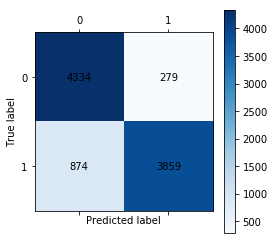

xgboost success! 
 cost time: 57.778735876083374 (s).


In [55]:
if __name__ =='__main__':
    x_train, x_test, y_train, y_test = get_data()
    cm, cost_time = xgboost(x_train, x_test, y_train)
    cm_plot(cm).show()# 混淆矩阵可视化
    print("xgboost success!",'\n',"cost time:",cost_time,"(s).")